# Pricing short put with barrier

In [1]:
#Libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Methodology

Geometric Brownian Motion for Autoregressive model in Pricing options:

<center>$ S_t = S_{t-1} e^{(\mu - \frac{\sigma^2}{2}) dt + \sigma \sqrt{dt} \varepsilon}$<center>

Where:

$S_t$: The stock price at time $t$.
    
$S_{t-1}$: Previous stock price.

$dt$: A small increment of time.

$\mu$: Expected return.

$\sigma$: Expected volatility.

$\varepsilon$: A random number sampled from a standard normal distribution.
  

$Payoff = max(0, X-S)$

## 1. Parameters info

In [2]:
n    =  10000 # number of simulations
s    =  4.58 # spot price
X    =  7.44 #Strike
barrier=9.58 #barrier
r    = -0.000005#risk free rate
q    = -0.04189233 #underlying performance
mu   = r-q #net underlying performance
sigma= 0.3124#desviacion típica;sigma
t0   = date(2016,5,7)#value date
t1   = date(2019,5,7)#expiration date
t    = int((t1-t0).days*250/365) # (t1-t0)*250/365  t<-as.numeric((t1-t0)*250/365) #precios a simular,uno por cada día
dt   = 1/250# delta
pd.options.display.float_format = '{:,.2f}'.format

## 2. Monte Carlo
We generate a data frame of j-column simulations over n-row periods. This looping will provide us not only a single path, but as many as we want to determine the closer expected value of the put, probabilistic speaking. There may be different ways to achieve this problem, here we share that we think has a user-friendly interpretation, but it's not the only one.

In [3]:
simulations = pd.DataFrame()
for j in range(n):
    period = [] # We create an empty list
    period.append(s) #the lists starts with the spot price.
    for i in range(1,t):
        p_i = period[i-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*dt**(1/2)*np.random.normal())
        period.append(p_i) # Once the formula has calculated a value, we append it to the created empty list, and so on i times (from 1 to t)
    
    simulations[j]=period #This we'll add the list of t(n) values to each j column.
simulations

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,...,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58,4.58
1,4.42,4.52,4.48,4.67,4.67,4.67,4.55,4.49,4.75,4.44,...,4.62,4.65,4.66,4.70,4.53,4.56,4.69,4.41,4.57,4.52
2,4.40,4.55,4.44,4.65,4.59,4.70,4.53,4.33,4.73,4.40,...,4.72,4.68,4.67,4.72,4.58,4.61,4.71,4.34,4.69,4.55
3,4.41,4.48,4.36,4.59,4.62,4.68,4.38,4.41,4.80,4.38,...,4.58,4.69,4.69,4.77,4.64,4.57,4.83,4.36,4.87,4.43
4,4.47,4.53,4.38,4.78,4.52,4.71,4.25,4.40,4.84,4.32,...,4.57,4.77,4.65,4.56,4.81,4.63,4.72,4.39,4.92,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,19.17,6.17,1.56,5.01,7.20,2.71,3.33,4.67,3.94,5.14,...,2.92,9.23,4.21,9.56,2.63,3.85,2.07,6.16,4.27,4.77
746,20.13,6.33,1.56,5.09,7.20,2.69,3.37,4.61,3.84,5.25,...,2.88,9.22,4.03,9.44,2.61,3.77,2.09,6.28,4.32,4.78
747,20.53,6.23,1.59,5.13,7.20,2.66,3.40,4.63,4.02,5.37,...,2.90,9.58,4.03,9.37,2.51,3.90,2.10,6.41,4.28,4.74
748,20.61,6.15,1.56,5.19,7.38,2.64,3.43,4.50,4.04,5.37,...,2.97,9.25,4.13,9.47,2.56,3.84,2.08,6.33,4.24,4.70


In [4]:
R = simulations.T # We just transpose here last dataframe to have simulations in rows, it doesn't matter if we don't apply any calculus. If we do, like median or std, then transpose we'll take place after it.
R

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,4.58,4.42,4.40,4.41,4.47,4.42,4.59,4.77,4.82,4.85,...,18.68,18.59,18.28,18.58,18.97,19.17,20.13,20.53,20.61,20.83
1,4.58,4.52,4.55,4.48,4.53,4.53,4.65,4.63,4.77,4.77,...,6.12,6.23,6.39,6.36,6.34,6.17,6.33,6.23,6.15,6.30
2,4.58,4.48,4.44,4.36,4.38,4.33,4.25,4.17,4.19,4.27,...,1.39,1.40,1.44,1.48,1.51,1.56,1.56,1.59,1.56,1.57
3,4.58,4.67,4.65,4.59,4.78,4.77,4.85,4.67,4.76,4.76,...,5.26,5.19,5.17,5.03,5.00,5.01,5.09,5.13,5.19,5.24
4,4.58,4.67,4.59,4.62,4.52,4.49,4.60,4.83,4.70,4.89,...,7.14,7.27,7.22,7.30,7.31,7.20,7.20,7.20,7.38,7.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.58,4.56,4.61,4.57,4.63,4.59,4.63,4.52,4.42,4.39,...,3.90,3.92,3.95,3.94,3.87,3.85,3.77,3.90,3.84,3.80
9996,4.58,4.69,4.71,4.83,4.72,4.76,4.60,4.75,4.80,5.02,...,1.95,1.98,2.02,2.04,2.06,2.07,2.09,2.10,2.08,2.05
9997,4.58,4.41,4.34,4.36,4.39,4.35,4.31,4.39,4.59,4.55,...,6.06,5.96,6.03,6.21,6.14,6.16,6.28,6.41,6.33,6.16
9998,4.58,4.57,4.69,4.87,4.92,4.96,5.00,5.08,5.16,5.04,...,4.61,4.61,4.59,4.48,4.44,4.27,4.32,4.28,4.24,4.21


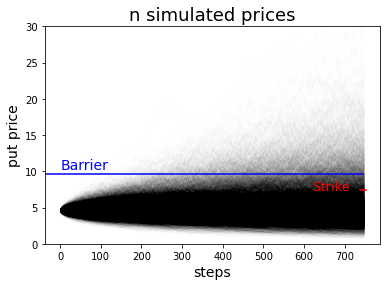

In [5]:
plt.plot(simulations,linewidth=0.5, alpha=0.01, color='black')
plt.annotate("Barrier", xy=(0, barrier+0.7), size = 14, color = "blue")
plt.axhline(y=barrier, color='blue', linestyle='-',xmax=0.95)

plt.ylim(0, 30)
plt.annotate("Strike", xy=(620, X), size = 13, color = "red")
plt.axhline(y=X, color='red', linestyle='-',xmin=0.94,xmax=0.96)

plt.title('n simulated prices',fontsize=18)
plt.ylabel('put price',fontsize=14)
plt.xlabel('steps', fontsize=14)
plt.show()

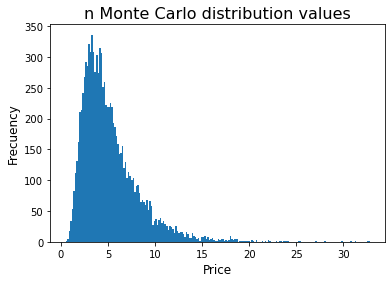

In [6]:
ending_values = simulations.loc[len(range(t-1))]
plt.hist(ending_values, bins=200)
plt.title('n Monte Carlo distribution values',fontsize=16)
plt.ylabel('Frecuency',fontsize=12)
plt.xlabel('Price',fontsize=12)
plt.show()

## 3. Short Put P&G
Computing zeros if we are above the Strike price. Otherwise, the difference between Strike minus Spot because that's our loss.

In [7]:
S_3y= R.iloc[:,t-1] #Last column. All simulated prices at time 't'.

In [8]:
# The lower the spot goes, the higher the loss against the Strike (remember short put, selling the right to sell, so that the buyer will execute selling for prices above the Spot.)
dif = [0 if (S_3y[i]>X) else (S_3y[i]-X) for i in range(len(S_3y))]
dif[0:10]

[0,
 -1.1406801228917915,
 -5.874486276364271,
 -2.202957861197146,
 0,
 -4.7360887240757545,
 -4.014862490832038,
 -2.7953288914022023,
 -3.6112902675498426,
 -2.1973740176497616]

In [9]:
pd.DataFrame(dif).describe() # just checking some info

,0
count,"10,000.00"
mean,-2.74
std,1.91
min,-6.95
25%,-4.33
50%,-2.98
75%,-0.94
max,0.00


## 4. Barrier computation: max prices and binary system
We can compute the put P&G accounting for expiration thereof by:
- First, calculating the max price along each path.
- Secondly, computing zeros for each max price above the barrier, ones below it.
By multiplying these lists, the first gives us the P&G; the second converts zero maturity prices if they have touched at some point the barrier, the P&G in itself if they didn't.

In [10]:
M = [max(R.iloc[i,:]) for i in range(n)] #Calculating the max put price for every period.
lenght = int(n/10)
M_2d = np.reshape(M, (10, lenght)) #note it is a 
pd.DataFrame(M_2d)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,20.83,8.37,4.58,8.53,7.65,5.72,4.59,7.42,4.93,6.42,...,7.89,7.42,8.29,8.00,10.98,4.83,7.06,4.69,5.19,8.10
1,4.98,6.64,9.32,4.78,6.53,5.05,10.23,6.11,6.18,10.66,...,6.63,5.37,8.34,11.32,7.05,6.12,4.60,11.22,4.58,5.30
2,17.47,4.74,9.49,5.65,6.68,5.73,4.58,13.08,7.38,7.22,...,9.07,5.85,7.38,9.74,6.55,5.16,14.68,12.66,6.53,5.16
3,8.52,12.11,6.38,4.72,7.10,23.25,5.66,7.14,5.02,6.59,...,10.13,5.08,5.58,7.46,8.26,4.81,7.00,9.42,4.83,10.82
4,6.07,6.84,10.19,6.55,5.89,4.60,6.45,5.93,6.00,6.86,...,5.06,5.75,6.72,5.09,6.47,7.09,5.45,10.70,5.37,16.01
5,9.32,4.74,6.32,6.01,5.49,6.28,12.16,5.54,4.63,6.01,...,7.28,13.50,5.53,5.49,7.07,13.88,7.28,8.38,8.99,5.78
6,5.37,6.83,8.68,7.85,5.58,6.38,5.08,6.10,19.26,5.13,...,5.72,4.76,5.04,5.78,4.77,5.19,5.62,8.70,5.64,5.45
7,7.88,5.46,6.29,5.86,7.27,5.31,4.86,8.73,7.78,5.05,...,5.88,7.55,6.42,10.10,5.20,4.95,6.34,6.00,4.74,5.19
8,4.83,7.36,12.03,12.02,6.75,5.01,5.95,4.68,5.38,5.34,...,4.61,4.70,5.30,5.65,11.09,5.19,5.54,4.99,9.05,7.40
9,5.18,7.67,5.43,5.06,7.12,5.18,7.99,6.56,5.03,4.58,...,6.46,10.75,5.41,12.05,6.14,4.76,5.05,7.67,6.85,6.01


In [11]:
#Now, in order to take into ccount the barrier. If we reach the barrier price, then the option expires, if it doesn't, the option continues. So we can make use of a binary system to compute 0 value if we reach the point, 1 otherwise.
#The intention is to convert in zero all potential cash flows that having touched the barrier.
#Therefore, give me zeros if we touched the barrier along the way, otherwise ones because the option hasn't expired.
#Under the barrier the tender we'll execute it in order to sell us at an upper price.
B = [0 if M[i]>=barrier else 1 for i in range(len(M))] # Again, we make use of list comprehension method with an else statement.
lenght = int(n/10)
arr_2d = np.reshape(B, (10, lenght))#Just checking there are permutations of zeros and ones along the way.
pd.DataFrame(arr_2d)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,0,1,1,0,...,1,1,1,0,1,1,1,0,1,1
2,0,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,0,0,1,1
3,1,0,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
5,1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,1,1
6,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
8,1,1,0,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1


In [12]:
RR = R.copy()
RR['<barrier']= B
RR2 = RR.loc[RR['<barrier'] == 1]
RR2.drop(columns='<barrier',inplace=True)
RR3 = RR2.T

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


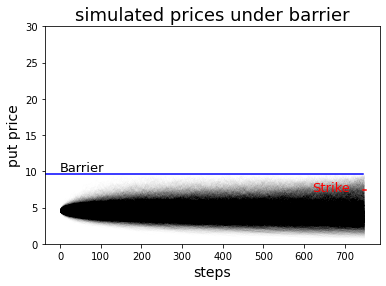

In [13]:
plt.plot(RR3,linewidth=0.08, alpha=0.05, color='black')

plt.annotate("Barrier", xy=(0, barrier+0.5), size = 13, color = "black")
plt.axhline(y=barrier, color='blue', linestyle='-',xmax=0.95)

plt.ylim(0, 30)
plt.annotate("Strike", xy=(620, X-0.2), size = 13, color = "red")
plt.axhline(y=X, color='red', linestyle='-',xmin=0.95,xmax=0.96)

plt.title('simulated prices under barrier',fontsize=18)
plt.ylabel('put price',fontsize=14)
plt.xlabel('steps',fontsize=14)
plt.show()

## 5. Results
We can create another list to store lists multiplication. This we'll give us all the losses not having touched the barrier (ones: "1") along the way, and zero results if at some point the barrier was touched and the put expired (zeros: "0").

In [14]:
products = []

for b, d in zip(B, dif):
    products.append(b * d)

put = np.mean(products)
put

-2.7082876195327756

In [15]:
pd.DataFrame(products).describe() 

,0
count,"10,000.00"
mean,-2.71
std,1.94
min,-6.95
25%,-4.33
50%,-2.97
75%,-0.72
max,0.00


In [16]:
put_value = put * np.exp(-(t)/360*r)

print('€{:,.2f}'.format(put_value))

€-2.71


In [17]:
Nominal = 3000000
n_options = Nominal/X #How many options for that nominal?
print('{:,.0f}'.format(n_options))

403,226


In [18]:
# Current loss
PnG = n_options * put_value
print('€{:,.2f}'.format(PnG))

€-1,092,062.84


## 6. Considerations

When time-series forecasting, there are many different methods to employ. We have chosen an autoregressive time-series model where future's value depends on the immediately preceding price. 

Please, if you find this code useful, make use of it under your own responsability.

Finally, if you want to collaborate in a project together, do not hesitate to get in touch whether you are an individual, a team or a firm. See: https://www.alejandroalvarez.uk/

Kind regards,

Alejandro Álvarez, CAd